In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import tensorflow as tf
import numpy as np
import sklearn
import gensim
from keras_preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

# Scrapping Data

In [ ]:
#scrapping news
import bs4
URL = "https://turnbackhoax.id/category/fitnah-hasut-hoax/page/"
upperframe = []

for page in range(1,421):
  data = []
  req = requests.get(URL + str(page) + "/")
  soup = BeautifulSoup(req.text, "html.parser")

  coverpage_news = soup.find_all("h3", attrs = {"class" : "entry-title mh-loop-title"})
  for j in coverpage_news:
    judul = j.find("a").get_text().strip()
    link = j.find("a")["href"].strip()
    data.append([judul, link])
  upperframe.extend(data)  

In [ ]:
#create dataframe for scrapping news
data = pd.DataFrame(upperframe, columns=["judul","link"])
data.head(10)

,judul,link
0,[SALAH] Pemberian Hadiah Senilai Rp100 Juta da...,https://turnbackhoax.id/2022/05/26/salah-pembe...
1,[SALAH] Akun WhatsApp Labuhanbatu Utara Melaku...,https://turnbackhoax.id/2022/05/26/salah-akun-...
2,[SALAH] Berita Tribun Manado “diduga cemburu d...,https://turnbackhoax.id/2022/05/26/salah-berit...
3,[SALAH] PBB Resmi Menangkan Rusia,https://turnbackhoax.id/2022/05/26/salah-pbb-r...
4,[SALAH] Foto Seorang Anak Yaman Tidur di Antar...,https://turnbackhoax.id/2022/05/26/salah-foto-...
5,[SALAH] “ANIES BASWEDAN KRITIS!! KUTUKAN AHOK ...,https://turnbackhoax.id/2022/05/26/salah-anies...
6,[SALAH] “LARI DARI TANGGUNG JAWAB APARAT TERPA...,https://turnbackhoax.id/2022/05/26/salah-lari-...
7,"[SALAH] Video “21 Mei 2022, Jokowi Resmi Tunju...",https://turnbackhoax.id/2022/05/26/salah-video...
8,[SALAH] Rusia Keluar dari PBB,https://turnbackhoax.id/2022/05/25/salah-rusia...
9,[SALAH] Vaksin mRNA Tidak Direkomendasikan Sel...,https://turnbackhoax.id/2022/05/24/salah-vaksi...


## Data Preprocessing

In [2]:
real_train = pd.read_excel("D://Kuliah//Bangkit 2022//Fake-News Detector//FakeNews-Model//data//real_train.xlsx")
real_train

,judul,link,kategori,label
0,jelang tutup tahun diler mobil sebar diskon ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
1,tabir harga suv maserati dibuka tahun depan,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
2,tampang skutik honda air blade dirombak total,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
3,sinarmas hana finance incar mobil bekas ekspat...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
4,orang kaya di indonesia terintimidasi harga ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
...,...,...,...,...
6706,tasya tampil di amerika,http://olahraga.kompas.com/read/xml/2015/08/31...,Valid,0
6707,pulang dari hongkong langsung berlatih,http://olahraga.kompas.com/read/xml/2015/08/31...,Valid,0
6708,cedera kaki sharapova absen di as terbuka,http://olahraga.kompas.com/read/xml/2015/08/31...,Valid,0
6709,marquez tidak ada lagi peluang menjadi juara d...,http://olahraga.kompas.com/read/xml/2015/08/31...,Valid,0


In [3]:
real_test = pd.read_excel("D://Kuliah//Bangkit 2022//Fake-News Detector//FakeNews-Model//data//real_testing.xlsx")
real_test

,judul,link,kategori,label
0,terima rekomendasi bawaslu kpu buka kembali pe...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
1,jokowi lantik sembilan komisioner komisi kejak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
2,surat pengunduran diri gus mus ditulistangan h...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
3,bnpb abu vulkanik gunung raung ke selatantengg...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
4,sempat gagal pan berencana ajukan calon lagi l...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
...,...,...,...,...
1672,ini dia empat tokoh kandidat kuat ketua umum pbnu,http://www.tribunnews.com/nasional/2015/08/04/...,Valid,0
1673,imigrasi jaksel amankan imigran gelap di seti...,http://www.tribunnews.com/nasional/2015/08/04/...,Valid,0
1674,presiden jokowi pasal penghinaan presiden untu...,http://www.tribunnews.com/nasional/2015/08/04/...,Valid,0
1675,mendagri curigai ada sabotase jelang pilkada s...,http://www.tribunnews.com/nasional/2015/08/04/...,Valid,0


In [4]:
fake_train = pd.read_excel("D://Kuliah//Bangkit 2022//Fake-News Detector//FakeNews-Model//data//fake_train.xlsx")
fake_train

,judul,link,kategori,label
0,Terapi Pijat untuk Anak Delay Speech (Lambat ...,https://turnbackhoax.id/2022/06/04/salah-terap...,Hoax,1
1,Foto Kebakaran Hutan di Pakistan,https://turnbackhoax.id/2022/06/04/salah-foto-...,Hoax,1
2,Link kuesioner berhadiah all new scoopy,https://turnbackhoax.id/2022/06/03/salah-link-...,Hoax,1
3,Singa Ini Menggali Kuburan Sendiri,https://turnbackhoax.id/2022/06/03/salah-singa...,Hoax,1
4,Innalillahi:Semua Sedih Ustadzah Kondang Mama...,https://turnbackhoax.id/2022/06/03/salah-innal...,Hoax,1
...,...,...,...,...
6706,Meme foto Sandiaga Uno hasil suntingan,https://turnbackhoax.id/2018/09/22/salah-meme-...,Hoax,1
6707,Pemelintiran konteks video â€œPrabowo Subiant...,https://turnbackhoax.id/2018/09/22/salah-pemel...,Hoax,1
6708,â€œDidit Prabowo akan menikahkan para gayâ€,https://turnbackhoax.id/2018/09/21/salah-didit...,Hoax,1
6709,â€œNasi Kotak Plus 2 Ayam dan Rendangâ€,https://turnbackhoax.id/2018/09/21/salah-nasi-...,Hoax,1


In [5]:
fake_test = pd.read_excel("D://Kuliah//Bangkit 2022//Fake-News Detector//FakeNews-Model//data//fake_testing.xlsx")
fake_test

,judul,link,kategori,label
0,â€œDiscount 35% Teriak 2 Periodeâ€,https://turnbackhoax.id/2018/09/20/salah-disco...,Hoax,1
1,"Pekerja LRT Ditangkap di Karawang, Disangka T...",https://turnbackhoax.id/2018/09/20/salah-peker...,Hoax,1
2,â€œIni yg bicaranya org super pinter dan bija...,https://turnbackhoax.id/2018/09/20/salah-ini-y...,Hoax,1
3,Seorang Anggota Komite Nasional Papua Barat (...,https://turnbackhoax.id/2018/09/20/salah-seora...,Hoax,1
4,Poster Undangan â€œDiskusi Peran dan Korupsi ...,https://turnbackhoax.id/2018/09/20/salah-poste...,Hoax,1
...,...,...,...,...
1672,Tunjangan Profesi Guru Dihapus,https://turnbackhoax.id/2015/09/29/hoax-tunjan...,Hoax,1
1673,Jokowi Hendak Minta Maaf kepada PKI/Keluarga PKI,https://turnbackhoax.id/2015/09/22/hoax-jokowi...,Hoax,1
1674,Ahok Melarang Kurban,https://turnbackhoax.id/2015/09/21/fitnah-ahok...,Hoax,1
1675,"Dituduh PKI Bangkit di Pamekasan, Jokowi Dica...",https://turnbackhoax.id/2015/09/18/hoax-ditudu...,Hoax,1


Data Training

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
# real_train["label"] = 0
# real_test["label"] = 0
# fake_train["label"] = 1
# fake_test["label"] = 1

In [8]:
train = pd.concat([real_train, fake_train], ignore_index=True)
test = pd.concat([real_test, fake_test], ignore_index=True)

In [9]:
#remove punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punctuation(text):
    no_punct = "".join([i for i in text if i not in punc])
    return no_punct

train['judul'] = train['judul'].apply(lambda x: remove_punctuation(x))
train.head(10)

,judul,link,kategori,label
0,jelang tutup tahun diler mobil sebar diskon ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
1,tabir harga suv maserati dibuka tahun depan,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
2,tampang skutik honda air blade dirombak total,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
3,sinarmas hana finance incar mobil bekas ekspat...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
4,orang kaya di indonesia terintimidasi harga ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
5,mazda punya bengkel bodi dan cat di tangerang,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
6,menunggangi godzilla di sirkuit sodegaura,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
7,mimpi nissan ciptakan mobil yang bisa ngobrol,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
8,pandji pragiwaksono jajal bisnis online,http://www.tribunnews.com/bisnis/2015/12/09/pa...,Valid,0
9,rabu sore nilai tukar ditutup melemah jadi rp ...,http://www.tribunnews.com/bisnis/2015/12/09/ra...,Valid,0


In [10]:
#lowering text
train['judul'] = train['judul'].apply(lambda x: x.lower())
train.head(10)

,judul,link,kategori,label
0,jelang tutup tahun diler mobil sebar diskon ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
1,tabir harga suv maserati dibuka tahun depan,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
2,tampang skutik honda air blade dirombak total,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
3,sinarmas hana finance incar mobil bekas ekspat...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
4,orang kaya di indonesia terintimidasi harga ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
5,mazda punya bengkel bodi dan cat di tangerang,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
6,menunggangi godzilla di sirkuit sodegaura,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
7,mimpi nissan ciptakan mobil yang bisa ngobrol,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
8,pandji pragiwaksono jajal bisnis online,http://www.tribunnews.com/bisnis/2015/12/09/pa...,Valid,0
9,rabu sore nilai tukar ditutup melemah jadi rp ...,http://www.tribunnews.com/bisnis/2015/12/09/ra...,Valid,0


In [11]:
#remove number
def remove_number(text):
    no_number = re.sub(r'\d', '', text)
    return no_number

train['judul'] = train['judul'].apply(lambda x: remove_number(x))
train.head(10)

,judul,link,kategori,label
0,jelang tutup tahun diler mobil sebar diskon ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
1,tabir harga suv maserati dibuka tahun depan,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
2,tampang skutik honda air blade dirombak total,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
3,sinarmas hana finance incar mobil bekas ekspat...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
4,orang kaya di indonesia terintimidasi harga ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
5,mazda punya bengkel bodi dan cat di tangerang,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
6,menunggangi godzilla di sirkuit sodegaura,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
7,mimpi nissan ciptakan mobil yang bisa ngobrol,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
8,pandji pragiwaksono jajal bisnis online,http://www.tribunnews.com/bisnis/2015/12/09/pa...,Valid,0
9,rabu sore nilai tukar ditutup melemah jadi rp ...,http://www.tribunnews.com/bisnis/2015/12/09/ra...,Valid,0


In [12]:
#remove emoji
train["judul"] = train["judul"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
train.head(10)

,judul,link,kategori,label
0,jelang tutup tahun diler mobil sebar diskon ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
1,tabir harga suv maserati dibuka tahun depan,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
2,tampang skutik honda air blade dirombak total,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
3,sinarmas hana finance incar mobil bekas ekspat...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
4,orang kaya di indonesia terintimidasi harga ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
5,mazda punya bengkel bodi dan cat di tangerang,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
6,menunggangi godzilla di sirkuit sodegaura,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
7,mimpi nissan ciptakan mobil yang bisa ngobrol,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0
8,pandji pragiwaksono jajal bisnis online,http://www.tribunnews.com/bisnis/2015/12/09/pa...,Valid,0
9,rabu sore nilai tukar ditutup melemah jadi rp ...,http://www.tribunnews.com/bisnis/2015/12/09/ra...,Valid,0


In [21]:
#remove whitespace
# def remove_whitespace(text):
#     if len(text.split()) > 1:
#         result = ' '.join(text.split())
#         return result

# df['judul'] = df['judul'].apply(remove_whitespace)
# df.head(10)

,judul,link,kategori,label
0,jelang tutup tahun diler mobil sebar diskon ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
1,tabir harga suv maserati dibuka tahun depan,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
2,tampang skutik honda air blade dirombak total,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
3,sinarmas hana finance incar mobil bekas ekspat...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
4,orang kaya di indonesia terintimidasi harga ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
5,mazda punya bengkel bodi dan cat di tangerang,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
6,menunggangi godzilla di sirkuit sodegaura,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
7,mimpi nissan ciptakan mobil yang bisa ngobrol,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,1
8,pandji pragiwaksono jajal bisnis online,http://www.tribunnews.com/bisnis/2015/12/09/pa...,Valid,1
9,rabu sore nilai tukar ditutup melemah jadi rp ...,http://www.tribunnews.com/bisnis/2015/12/09/ra...,Valid,1


In [13]:
#define stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#define stopwords
stopword = stopwords.words('indonesian')
stopword.extend(["c", "rp", "di", "ok", "tak", "r", "x", "i", "ini", "jadi", "ada", "ke", "dan", "akan", 
"sang", "yang", "ada", "bagi", "untuk", "pada", "dengan", "saat", "tidak", "nak", "tapi", "buat", "semua",
"dari", "ingin", "gara", "saat", "anak", "hey", "bro"])

def clean_text(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stopword:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return tokens

train['judul_baru'] = train['judul'].apply(lambda x: clean_text(x))
train.head(10)

,judul,link,kategori,label,judul_baru
0,jelang tutup tahun diler mobil sebar diskon ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[jelang, tutup, diler, mobil, sebar, diskon, h..."
1,tabir harga suv maserati dibuka tahun depan,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[tabir, harga, suv, maserati, dibuka]"
2,tampang skutik honda air blade dirombak total,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[tampang, skutik, honda, air, blade, dirombak,..."
3,sinarmas hana finance incar mobil bekas ekspat...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[sinarmas, hana, finance, incar, mobil, bekas,..."
4,orang kaya di indonesia terintimidasi harga ha...,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[orang, kaya, indonesia, terintimidasi, harga,..."
5,mazda punya bengkel bodi dan cat di tangerang,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[mazda, bengkel, bodi, cat, tangerang]"
6,menunggangi godzilla di sirkuit sodegaura,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[menunggangi, godzilla, sirkuit, sodegaura]"
7,mimpi nissan ciptakan mobil yang bisa ngobrol,http://www.tribunnews.com/otomotif/2015/12/09/...,Valid,0,"[mimpi, nissan, ciptakan, mobil, ngobrol]"
8,pandji pragiwaksono jajal bisnis online,http://www.tribunnews.com/bisnis/2015/12/09/pa...,Valid,0,"[pandji, pragiwaksono, jajal, bisnis, online]"
9,rabu sore nilai tukar ditutup melemah jadi rp ...,http://www.tribunnews.com/bisnis/2015/12/09/ra...,Valid,0,"[rabu, sore, nilai, tukar, ditutup, melemah, d..."


Data Testing

In [14]:
#remove punctuation
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punctuation(text):
    no_punct = "".join([i for i in text if i not in punc])
    return no_punct

test['judul'] = test['judul'].apply(lambda x: remove_punctuation(x))
test.head(10)

,judul,link,kategori,label
0,terima rekomendasi bawaslu kpu buka kembali pe...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
1,jokowi lantik sembilan komisioner komisi kejak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
2,surat pengunduran diri gus mus ditulistangan h...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
3,bnpb abu vulkanik gunung raung ke selatantengg...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
4,sempat gagal pan berencana ajukan calon lagi l...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
5,bnn musnahkan puluhan ribu gram sabu dan ratus...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
6,kabareskrim kaji adanya laporan soal penculika...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
7,kpk dipolisikan terkait penculikan oc kaligis ...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
8,saat rekonstruksi pelaku pembunuhan dan pembak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
9,setelah pertemuan dengan mui bpjs kesehatan ti...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0


In [15]:
#lowering text
test['judul'] = test['judul'].apply(lambda x: x.lower())
test.head(10)

,judul,link,kategori,label
0,terima rekomendasi bawaslu kpu buka kembali pe...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
1,jokowi lantik sembilan komisioner komisi kejak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
2,surat pengunduran diri gus mus ditulistangan h...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
3,bnpb abu vulkanik gunung raung ke selatantengg...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
4,sempat gagal pan berencana ajukan calon lagi l...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
5,bnn musnahkan puluhan ribu gram sabu dan ratus...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
6,kabareskrim kaji adanya laporan soal penculika...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
7,kpk dipolisikan terkait penculikan oc kaligis ...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
8,saat rekonstruksi pelaku pembunuhan dan pembak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
9,setelah pertemuan dengan mui bpjs kesehatan ti...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0


In [16]:
#remove number
def remove_number(text):
    no_number = re.sub(r'\d', '', text)
    return no_number

test['judul'] = test['judul'].apply(lambda x: remove_number(x))
test.head(10)

,judul,link,kategori,label
0,terima rekomendasi bawaslu kpu buka kembali pe...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
1,jokowi lantik sembilan komisioner komisi kejak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
2,surat pengunduran diri gus mus ditulistangan h...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
3,bnpb abu vulkanik gunung raung ke selatantengg...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
4,sempat gagal pan berencana ajukan calon lagi l...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
5,bnn musnahkan puluhan ribu gram sabu dan ratus...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
6,kabareskrim kaji adanya laporan soal penculika...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
7,kpk dipolisikan terkait penculikan oc kaligis ...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
8,saat rekonstruksi pelaku pembunuhan dan pembak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
9,setelah pertemuan dengan mui bpjs kesehatan ti...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0


In [17]:
#remove emoji
test["judul"] = test["judul"].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))
test.head(10)

,judul,link,kategori,label
0,terima rekomendasi bawaslu kpu buka kembali pe...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
1,jokowi lantik sembilan komisioner komisi kejak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
2,surat pengunduran diri gus mus ditulistangan h...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
3,bnpb abu vulkanik gunung raung ke selatantengg...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
4,sempat gagal pan berencana ajukan calon lagi l...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
5,bnn musnahkan puluhan ribu gram sabu dan ratus...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
6,kabareskrim kaji adanya laporan soal penculika...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
7,kpk dipolisikan terkait penculikan oc kaligis ...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
8,saat rekonstruksi pelaku pembunuhan dan pembak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0
9,setelah pertemuan dengan mui bpjs kesehatan ti...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0


In [18]:
#define stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#define stopwords
stopword = stopwords.words('indonesian')
stopword.extend(["c", "rp", "di", "ok", "tak", "r", "x", "i", "ini", "jadi", "ada", "ke", "dan", "akan", 
"sang", "yang", "ada", "bagi", "untuk", "pada", "dengan", "saat", "tidak", "nak", "tapi", "buat", "semua",
"dari", "ingin", "gara", "saat", "anak", "hey", "bro"])

def clean_text(text, stem=False):
    tokens = []
    for token in text.split():
        if token not in stopword:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return tokens

test['judul_baru'] = test['judul'].apply(lambda x: clean_text(x))
test.head(10)

,judul,link,kategori,label,judul_baru
0,terima rekomendasi bawaslu kpu buka kembali pe...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[terima, rekomendasi, bawaslu, kpu, buka, pend..."
1,jokowi lantik sembilan komisioner komisi kejak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[jokowi, lantik, sembilan, komisioner, komisi,..."
2,surat pengunduran diri gus mus ditulistangan h...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[surat, pengunduran, gus, mus, ditulistangan, ..."
3,bnpb abu vulkanik gunung raung ke selatantengg...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[bnpb, abu, vulkanik, gunung, raung, selatante..."
4,sempat gagal pan berencana ajukan calon lagi l...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[gagal, pan, berencana, ajukan, calon, lawan, ..."
5,bnn musnahkan puluhan ribu gram sabu dan ratus...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[bnn, musnahkan, puluhan, ribu, gram, sabu, ra..."
6,kabareskrim kaji adanya laporan soal penculika...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[kabareskrim, kaji, laporan, penculikan, oc, k..."
7,kpk dipolisikan terkait penculikan oc kaligis ...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[kpk, dipolisikan, terkait, penculikan, oc, ka..."
8,saat rekonstruksi pelaku pembunuhan dan pembak...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[rekonstruksi, pelaku, pembunuhan, pembakaran,..."
9,setelah pertemuan dengan mui bpjs kesehatan ti...,http://www.tribunnews.com/nasional/2015/08/06/...,Valid,0,"[pertemuan, mui, bpjs, kesehatan, haram]"


# Build and Training Model (LSTM)

In [19]:
train_sentences = train["judul_baru"].tolist()
test_sentences = test["judul_baru"].tolist()

In [20]:
vocab_size = 2000
embedding_dim = 16
max_length = 100
trunc_type = "post"
padding_type = "post"
oov_tok = "<OOV>"

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

In [22]:
from keras_preprocessing.sequence import pad_sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(train_sequences, maxlen = max_length)

In [23]:
test_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(test_sequences, maxlen = max_length)

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128)))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           32000     
                                                                 
 bidirectional (Bidirectiona  (None, 256)              148480    
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 180,737
Trainable params: 180,737
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [27]:
history = model.fit(training_padded, train["label"], validation_data=(testing_padded, test["label"]), epochs=5)

Epoch 1/5
420/420 [==============================] - 78s 175ms/step - loss: 0.5022 - accuracy: 0.7687 - val_loss: 0.6257 - val_accuracy: 0.6780
Epoch 2/5
420/420 [==============================] - 70s 166ms/step - loss: 0.3033 - accuracy: 0.8784 - val_loss: 0.4263 - val_accuracy: 0.7984
Epoch 3/5
420/420 [==============================] - 74s 176ms/step - loss: 0.2046 - accuracy: 0.9139 - val_loss: 0.4486 - val_accuracy: 0.7955
Epoch 4/5
420/420 [==============================] - 69s 163ms/step - loss: 0.1722 - accuracy: 0.9276 - val_loss: 0.5074 - val_accuracy: 0.7859
Epoch 5/5
420/420 [==============================] - 67s 160ms/step - loss: 0.1707 - accuracy: 0.9309 - val_loss: 0.5006 - val_accuracy: 0.7970


In [28]:
model.save("lstm_model.h5")

In [29]:
model.save_weights("lstm_weights.h5")

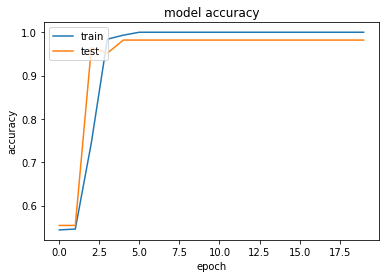

In [ ]:
# History training

import matplotlib.pyplot as plt

#Summary acc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



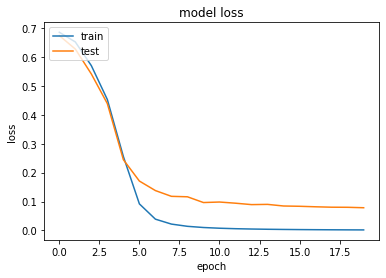

In [ ]:
# summmary loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
# CARA 2 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers

# tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
# tokenizer.fit_on_texts(x_train)
# tokenizer.fit_on_texts(x_test)

# seq_train = tokenizer.texts_to_sequences(x_train)
# seq_test = tokenizer.texts_to_sequences(x_test)

# #Padding
# pad_train = pad_sequences(seq_train, maxlen=500, padding='post', truncating='post')
# pad_test = pad_sequences(seq_test, maxlen=500, padding='post', truncating='post')


# #Sequential model has a 50 cell LSTM layer before Dense layers
# model = tf.keras.models.Sequential()

# model.add(tf.keras.layers.LSTM(50))
# model.add(tf.keras.layers.Dense(20,activation='relu'))
# model.add(tf.keras.layers.Dense(5,activation='relu'))
# model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

# model.summary()

#Compile model with binary_crossentropy loss, Adam optimizer, and accuracy metrics
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),
#               loss="binary_crossentropy", metrics=['accuracy'])

#Train model on 10 epochs
# model.fit(pad_train, y_train, validation_data=[pad_test,y_test], epochs=20)

In [18]:
tokenizer = Tokenizer(num_words=2000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)
tokenizer.fit_on_texts(x_test)

In [19]:
seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

In [20]:
# #Padding
pad_train = pad_sequences(seq_train, maxlen=500, padding='post', truncating='post')
pad_test = pad_sequences(seq_test, maxlen=500, padding='post', truncating='post')

In [21]:
# #Sequential model has a 50 cell LSTM layer before Dense layers
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.LSTM(50))
model.add(tf.keras.layers.Dense(20,activation='relu'))
model.add(tf.keras.layers.Dense(5,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [22]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.